In [ ]:
########################################################
###          PART 3: Happiness and Weather Regression####
#####           B187939                    ##############
##########################################################

In [809]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import matplotlib as mlp
from sklearn import preprocessing

In [438]:
happy = pd.read_csv('weather_update.csv')

In [439]:
happy.drop('Unnamed: 0', axis=1, inplace=True)

In [440]:
happy.head()

,Stations,Latitude,Longtitude,Location,Area,Area_Codes,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size
0,aberporth,52.139,-4.570,South,WALES,W92000004,9.56,16.54,39.45,34.45,7.44,19540
1,armagh,54.352,-6.649,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540
2,ballypatrick,55.181,-6.153,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540
3,bradford,53.813,-1.772,Central,YORKSHIRE AND THE HUMBER,E12000003,10.21,16.60,38.56,34.63,7.41,13110
4,braemar,57.006,-3.396,Central,SCOTLAND,S92000003,9.16,16.90,39.75,34.19,7.45,22760


In [441]:
weather = pd.read_csv('final_stations.csv')
weather.drop('Unnamed: 0', axis=1, inplace=True)
weather.head()

,Stations,Month,Tmax,Tmin,AF,Rain,Sun,Tmean,Notes,Year
0,aberporth,6.5,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,NaN,NaN
1,armagh,6.5,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,NaN,NaN
2,ballypatrick,6.5,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,NaN,NaN
3,bradford,6.5,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,NaN,NaN
4,braemar,6.5,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,NaN,NaN


In [442]:
weather_happy = pd.merge(weather, happy,left_index=True,right_index=True, how='left')
weather_happy


,Stations_x,Month,Tmax,Tmin,AF,Rain,Sun,Tmean,Notes,Year,...,Longtitude,Location,Area,Area_Codes,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size
0,aberporth,6.500,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,NaN,NaN,...,-4.570,South,WALES,W92000004,9.56,16.54,39.45,34.45,7.44,19540
1,armagh,6.500,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,NaN,NaN,...,-6.649,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540
2,ballypatrick,6.500,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,NaN,NaN,...,-6.153,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540
3,bradford,6.500,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,NaN,NaN,...,-1.772,Central,YORKSHIRE AND THE HUMBER,E12000003,10.21,16.60,38.56,34.63,7.41,13110
4,braemar,6.500,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,NaN,NaN,...,-3.396,Central,SCOTLAND,S92000003,9.16,16.90,39.75,34.19,7.45,22760
5,camborne,6.500,13.705556,8.704762,0.607143,88.967460,132.821429,11.205159,NaN,NaN,...,-5.327,South,SOUTH WEST,E12000009,8.79,15.92,40.44,34.84,7.50,13600
6,cambridge,6.500,15.036508,6.726190,3.214286,47.165476,128.657576,10.881349,NaN,NaN,...,0.102,South,EAST,E12000006,8.53,15.69,41.69,34.09,7.51,9960
7,cardiff,6.500,15.085317,7.323413,2.769841,100.413889,NaN,11.204365,NaN,NaN,...,-3.187,South,WALES,W92000004,9.56,16.54,39.45,34.45,7.44,19540
8,chivenor,6.500,14.702850,8.017929,1.680014,79.007143,NaN,11.360390,NaN,NaN,...,-4.147,South,SOUTH WEST,E12000009,8.79,15.92,40.44,34.84,7.50,13600
9,cwmystwyth,6.125,11.787090,4.873422,5.296086,154.481250,99.250511,8.330256,NaN,NaN,...,-3.802,South,WALES,W92000004,9.56,16.54,39.45,34.45,7.44,19540


In [841]:
weather_happy.to_csv('weather_happy.csv')

In [443]:
weather_happy.drop(weather_happy[['Notes','Year','Month']], axis=1, inplace= True)

In [95]:
#save to wather_happy
weather_happy.to_csv('weather_happy.csv')

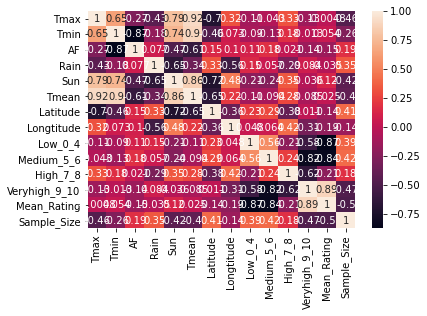

In [38]:
#check correlation between column values

corrMatrix = weather_happy.corr()
ax.plot= 
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [262]:
#features 
X = weather_happy[['Tmax','Tmin','Tmean','AF','Rain']].values.reshape(-1,5)
X_ = weather_happy[['Tmax','Tmin','Tmean','AF','Rain']]
#av_happy 
Y = weather_happy['Mean_Rating']

In [798]:
lm = LinearRegression()
model = lm.fit(X,Y)

In [799]:
print ('estimate intercept is:', lm.intercept_)

estimate intercept is: 7.704120541612826


In [246]:
print ( 'coef of determination/r-squared is:',model.score(X,Y))

coef of determination/r-squared is: 0.07211319128025262


In [247]:
print ('estimate coeff/slope is:', lm.coef_)

estimate coeff/slope is: [ 2.78752587e-02 -5.36082870e-02 -1.28665142e-02 -4.29610059e-02
  5.89017589e-05]


In [263]:
coef = zip(X_.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X_.columns, lm.coef_)), columns=['features','coeffiecients'])
coef_df

,features,coeffiecients
0,Tmax,0.025433
1,Tmin,-0.062605
2,Tmean,-0.018586
3,AF,-0.055508
4,Rain,0.000138


In [250]:
#predict mean_happiness scores for the values of X
Y_pred = model.predict(X)  # make predictions
Y_pred

array([7.47566485, 7.49674149, 7.52010573, 7.47608288, 7.397549  ,
       7.45450461, 7.48737169, 7.47479032, 7.47044877, 7.44582561,
       7.49043194, 7.48321834, 7.44827727, 7.43323005, 7.47758452,
       7.45386799, 7.48146717, 7.46819206, 7.46812672, 7.46932781,
       7.48400778, 7.4654198 , 7.48279427, 7.47805251, 7.47550766,
       7.47558072, 7.46593526, 7.48887426, 7.50199274, 7.50668159,
       7.47719065, 7.50281769, 7.44938914, 7.48313836, 7.49501249,
       7.48212351, 7.46267275])

In [251]:
#Now we will build a training model and use it to predict using test set
from sklearn.model_selection import train_test_split

In [812]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 0)

In [813]:
lm.fit(X_train,Y_train)

LinearRegression()

In [814]:
y_pred = lm.predict(X_test)

In [815]:
print('Linear Regression R squared:',lm.score(X_test,Y_test))
# R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Linear Regression R squared: -0.7643711966231308


In [256]:
from sklearn.metrics import mean_squared_error
print('linear mean square error:', mean_squared_error(y_pred, Y_test))
print('linear regression RMSE, root mean square error:', np.sqrt(mean_squared_error(y_pred, Y_test)))

#RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#Lower the MSE, the closer is forecast to actual

linear mean square error: 0.0063958455877588544
linear regression RMSE, root mean square error: 0.0799740307084672


In [257]:
#################
#What about trying different regression model, see if it can improve our r-squared even more?
# ###RANDOM FORREST regression model#######
############################################

In [258]:
from sklearn import ensemble 
from sklearn.ensemble import RandomForestRegressor

In [826]:
forest = RandomForestRegressor(n_estimators=30,random_state=42)
forest.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [827]:
print('Random forest R-squared:', forest.score(X_test,Y_test))
#quite low R-squared

Random forest R-squared: 0.1751685823754967


In [828]:
print('Forest mean squared error:', mean_squared_error(forest.predict(X_test),Y_test))
print('Forest RMSE:', np.sqrt(mean_squared_error(forest.predict(X_test),Y_test)))
#Random forest seems to give a better performance than linear regression

Forest mean squared error: 0.002990013888888827
Forest RMSE: 0.054681019457292736


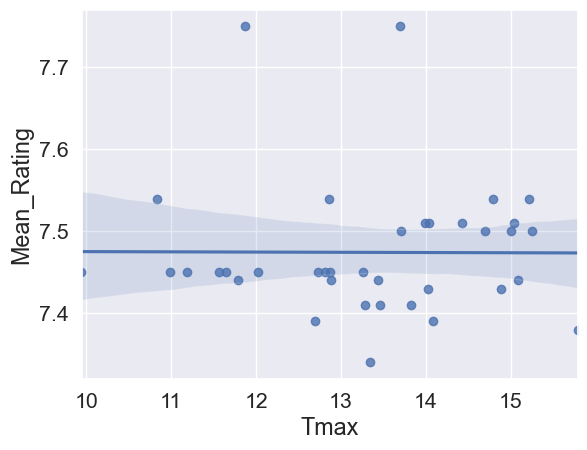

In [829]:
ax = sns.regplot(x='Tmax', y="Mean_Rating", data=weather_happy)
# doenst look like there is any sort of regression7linear relationship here. prob thats why LM is not ideal for this kind
#of regression model

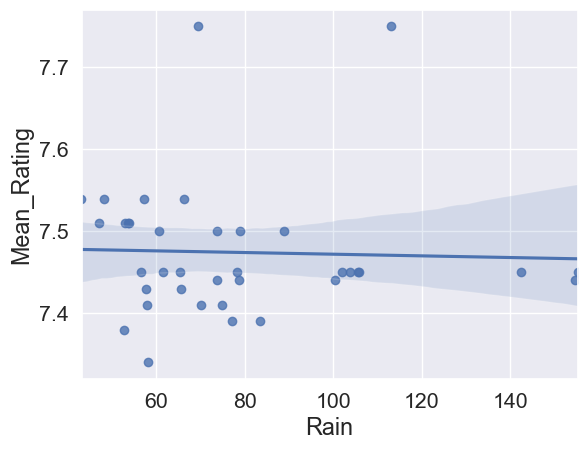

In [830]:
ax = sns.regplot(x='Rain', y="Mean_Rating", data=weather_happy)

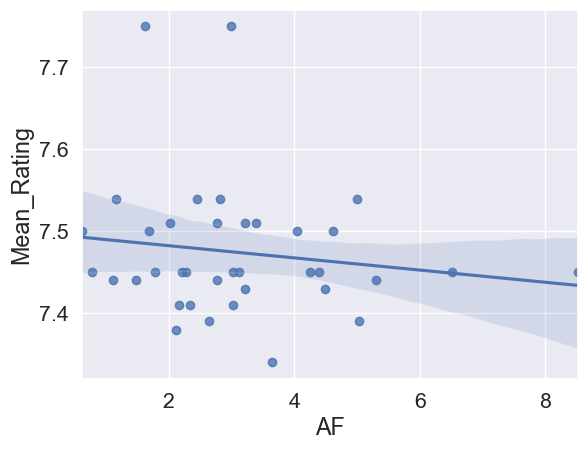

In [831]:
ax = sns.regplot(x='AF', y="Mean_Rating", data=weather_happy)


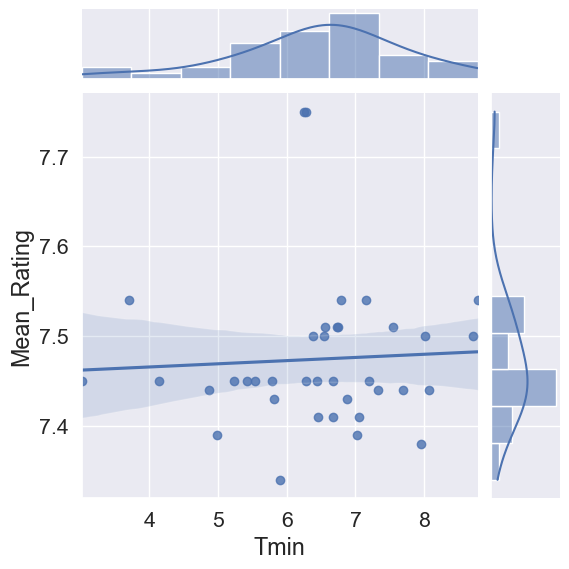

In [832]:
ax = sns.jointplot(x='Tmin', y="Mean_Rating", data=weather_happy, kind="reg")


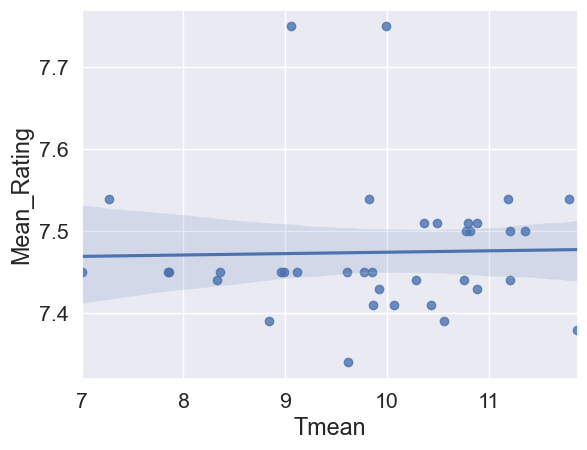

In [833]:
ax = sns.regplot(x='Tmean', y="Mean_Rating", data=weather_happy)



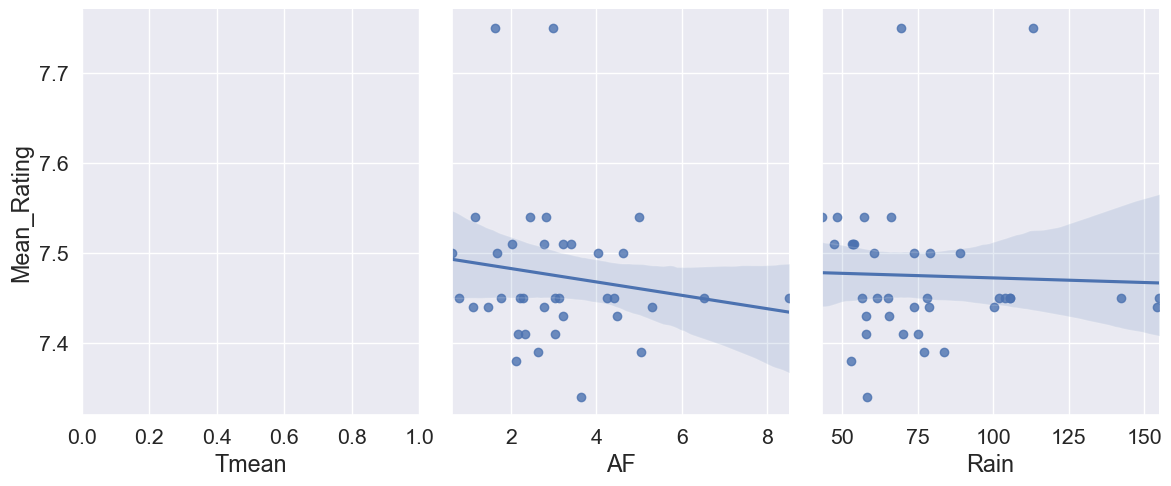

In [834]:
AX = sns.pairplot(weather_happy, x_vars=['Tmean','AF','Rain'], y_vars=["Mean_Rating"],
             height=5, aspect=.8, kind="reg");

In [309]:
wh_short= weather_happy[['Tmax','Tmin','Tmean','AF','Rain','Latitude','Longtitude','Sun','Low_0_4','Medium_5_6','High_7_8','Veryhigh_9_10','Mean_Rating']]

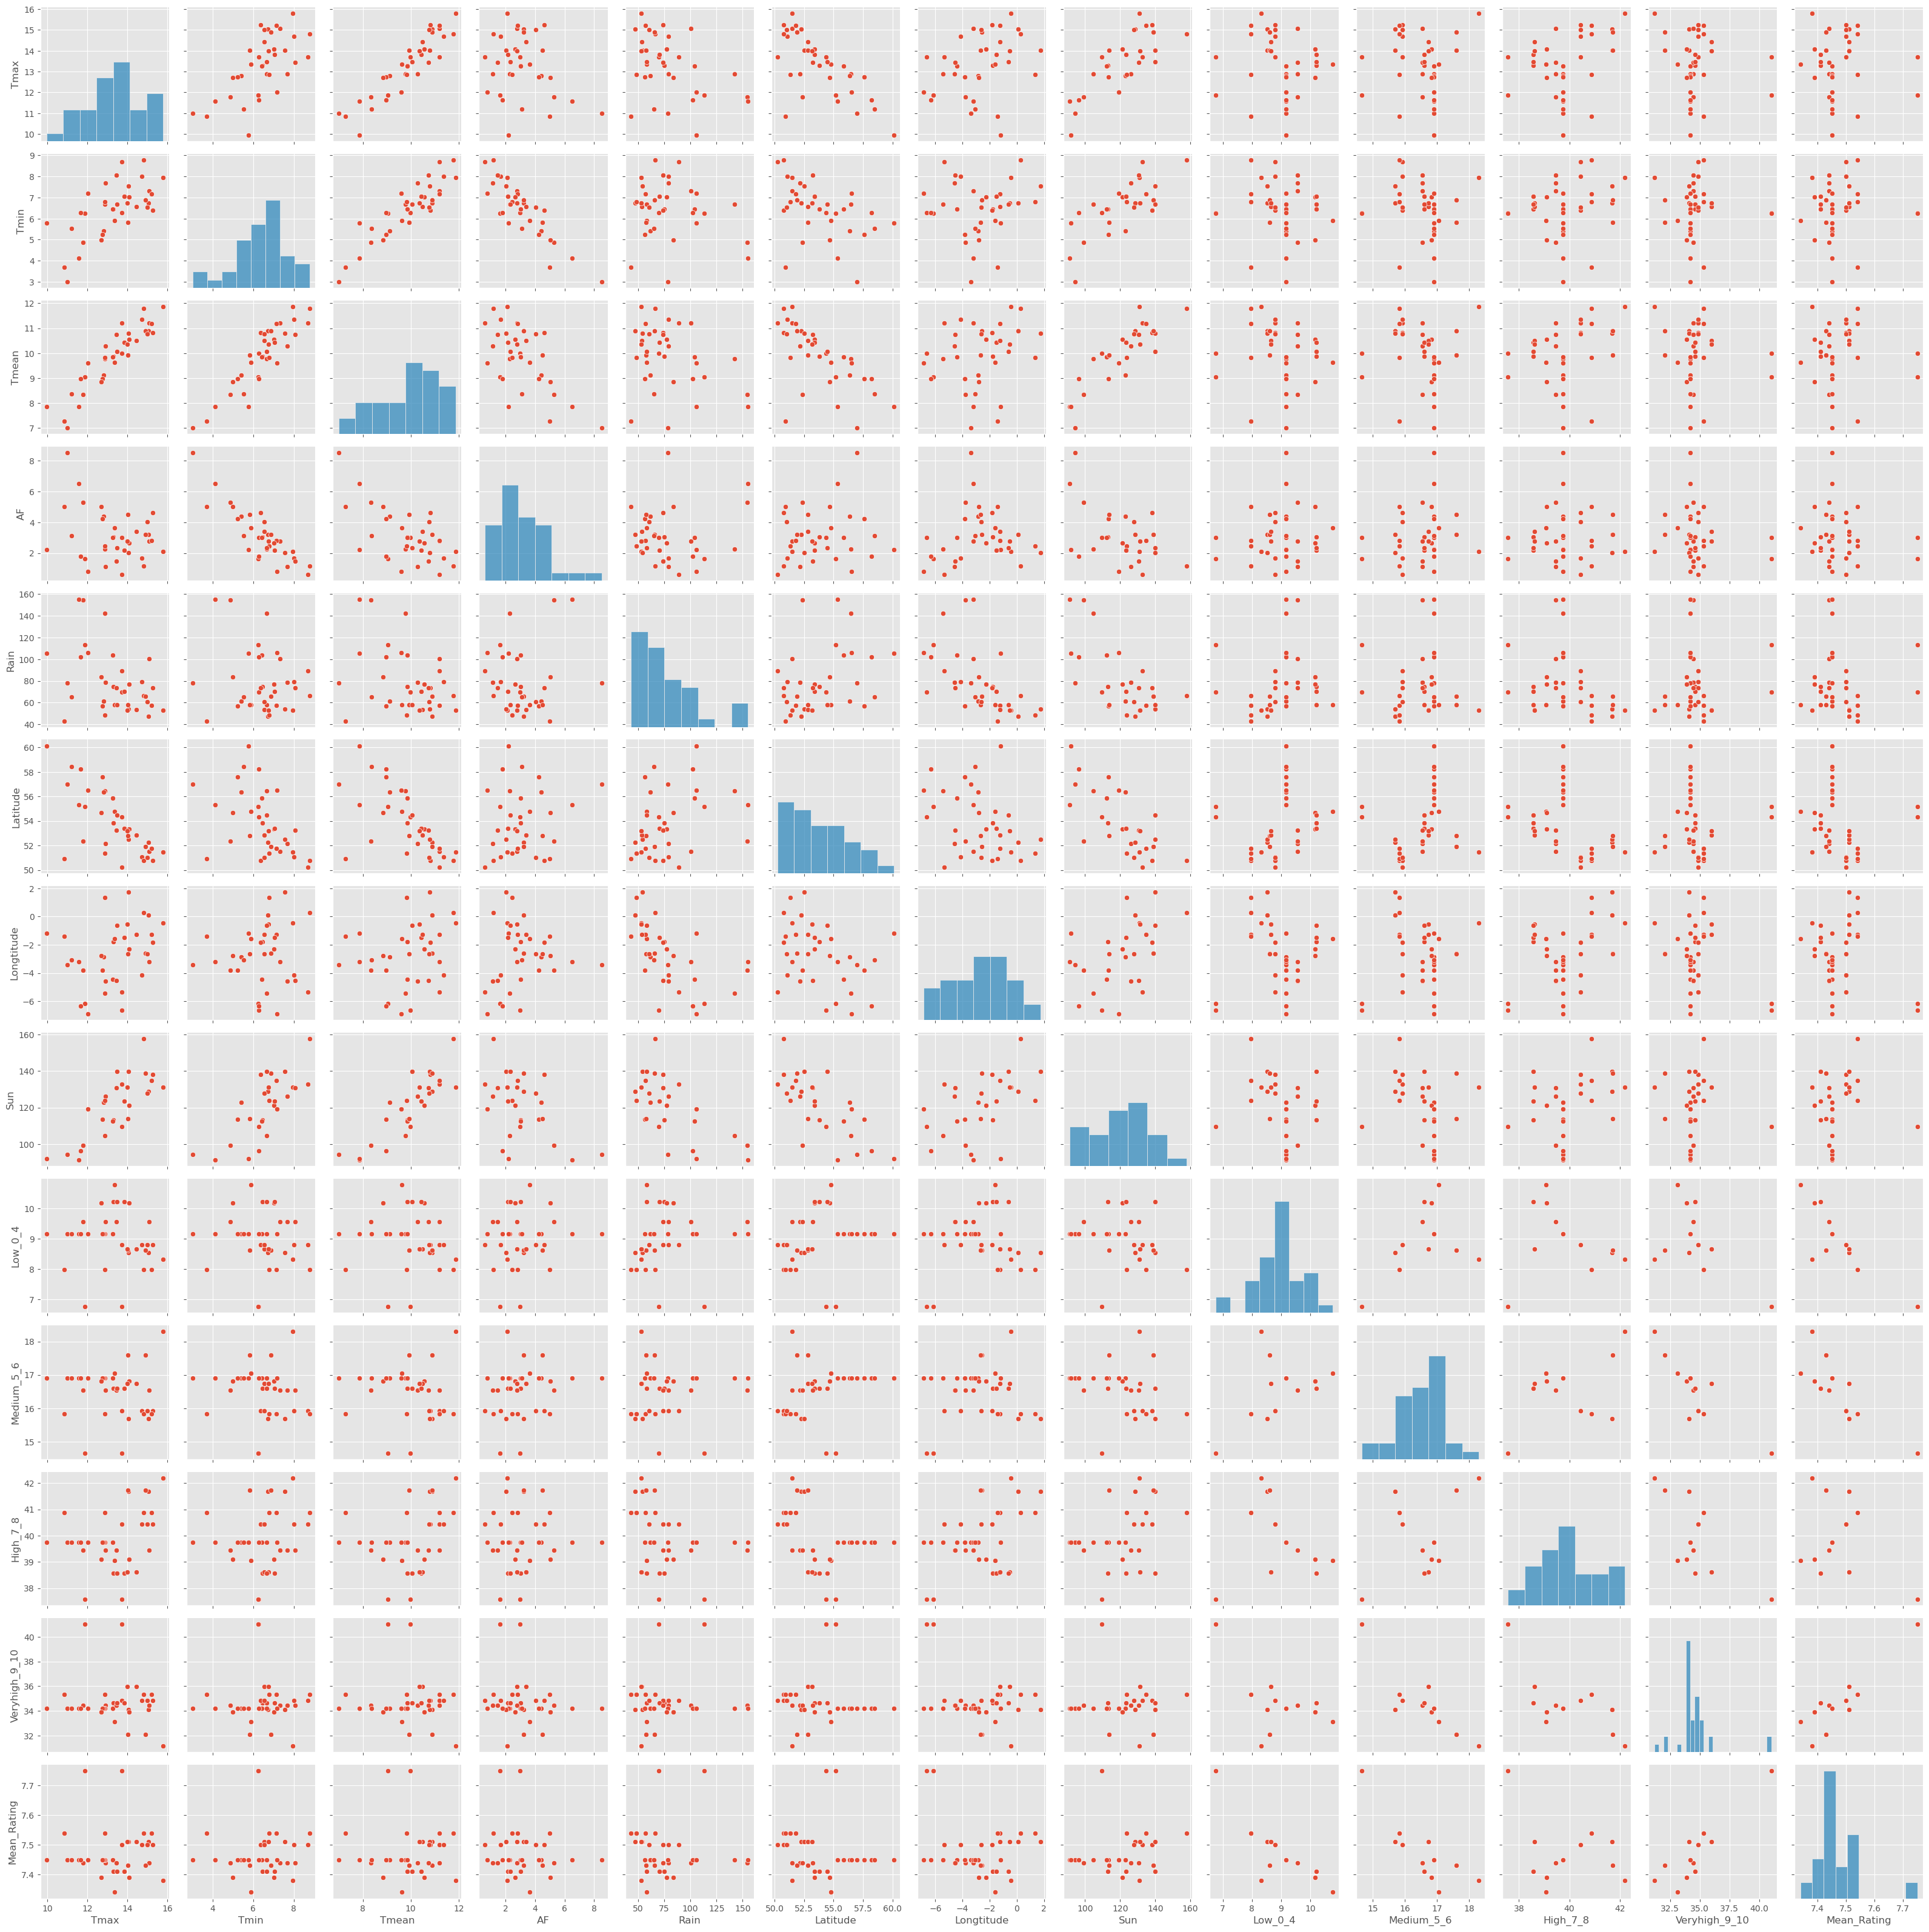

In [310]:
g = sns.PairGrid(wh_short)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
# Map reveales that there is not a linear relationship

In [327]:
weather_happy.head()


,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Latitude,Longtitude,Location,Area,Area_Codes,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,52.139,-4.570,South,WALES,W92000004,9.56,16.54,39.45,34.45,7.44,19540
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,54.352,-6.649,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,55.181,-6.153,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,53.813,-1.772,Central,YORKSHIRE AND THE HUMBER,E12000003,10.21,16.60,38.56,34.63,7.41,13110
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,57.006,-3.396,Central,SCOTLAND,S92000003,9.16,16.90,39.75,34.19,7.45,22760


In [334]:
#### Interesting to investigate if Latitude is somehow correlated to the happiness rating#

#################################

X_lat = weather_happy[['Latitude']]
model_lat = lm.fit(X_lat,Y)
X_train_lat, X_test_lat, Y_train_lat, Y_test_lat = train_test_split(X_lat,Y, test_size=0.2, random_state= 0)
lm.fit(X_train_lat,Y_train_lat)
y_pred_lat = lm.predict(X_test_lat)
print('linear mean square error:', mean_squared_error(y_pred_lat, Y_test_lat))
print('linear regression RMSE, root mean square error:', np.sqrt(mean_squared_error(y_pred_lat, Y_test_lat)))

linear mean square error: 0.003520038118673664
linear regression RMSE, root mean square error: 0.059329909140952375


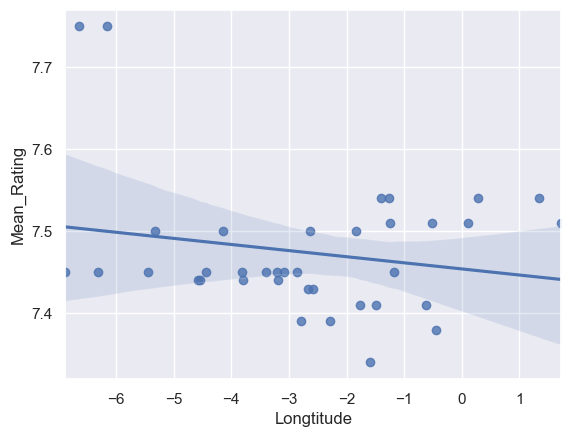

In [342]:
ax = sns.regplot(x='Longtitude', y="Mean_Rating", data=weather_happy)
#Longtitude seems better correlated than Latitude


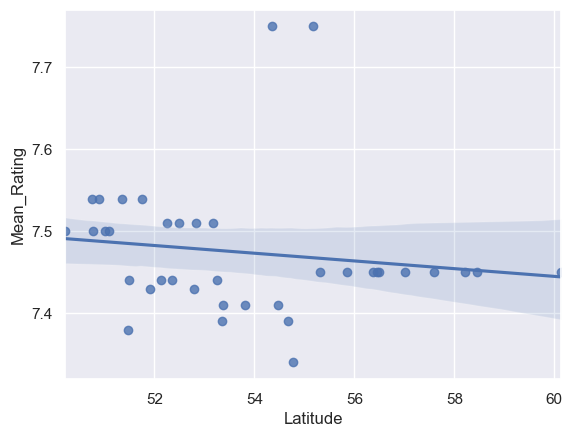

In [343]:
ax = sns.regplot(x='Latitude', y="Mean_Rating", data=weather_happy)


In [837]:
X_long = weather_happy[['Longtitude']]
model_lat = lm.fit(X_long,Y)
X_train_long, X_test_long, Y_train_long, Y_test_long = train_test_split(X_long,Y, test_size=0.2, random_state= 0)
lm.fit(X_train_long,Y_train_long)
y_pred_long = lm.predict(X_test_long)
print('linear mean square error:', mean_squared_error(y_pred_long, Y_test_long))
print('linear regression RMSE, root mean square error:', np.sqrt(mean_squared_error(y_pred_long, Y_test_long)))

linear mean square error: 0.0048836320355622916
linear regression RMSE, root mean square error: 0.06988298816995658


In [839]:
lm.score(X_long,Y)

0.02798982549993656

In [ ]:
############################
##try another regression using categorical variables: Location or Area vs Happy Rating###
###########################

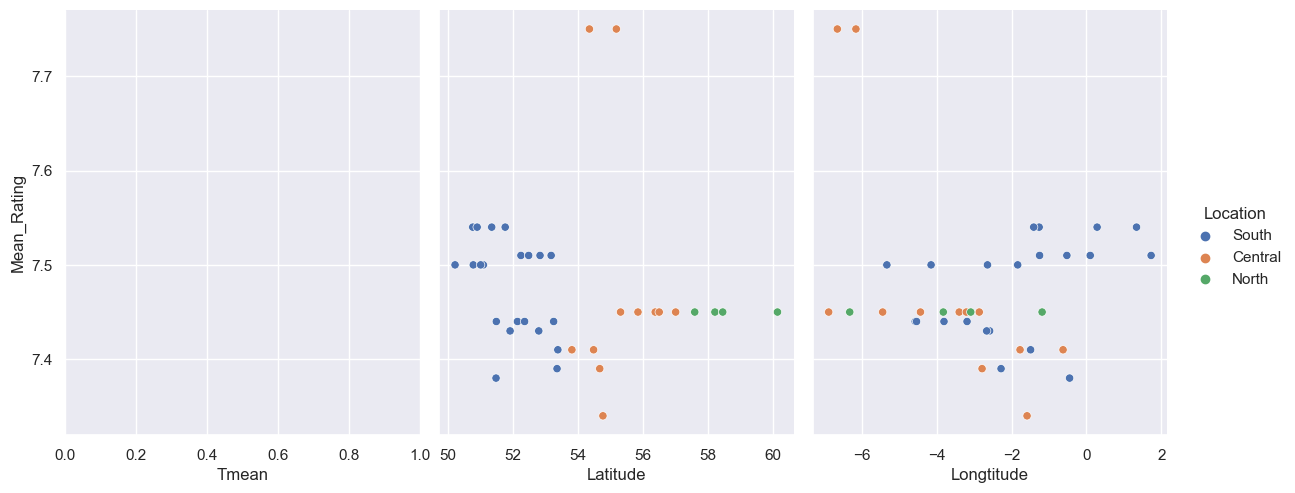

In [355]:
#some plots with latitude and longtitude vs happy
sns.pairplot(weather_happy,x_vars=['Tmean','Latitude','Longtitude'],y_vars=['Mean_Rating'], height=5, aspect=.8,hue ='Location')

#most people from the South seem to be more happy than the other regions

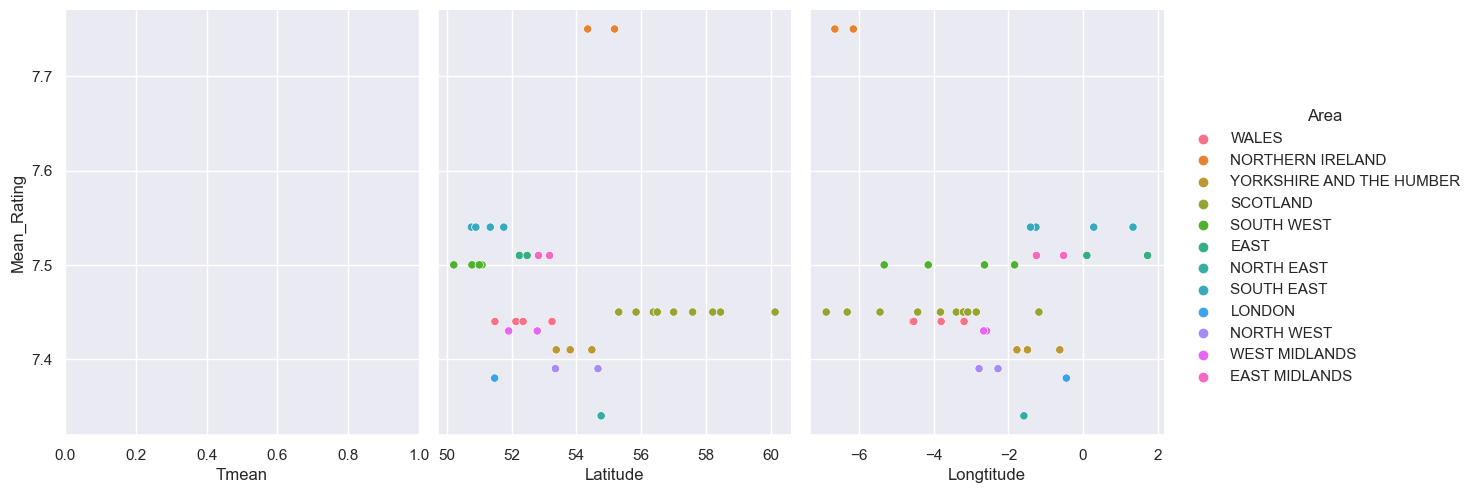

In [358]:
sns.pairplot(weather_happy,x_vars=['Tmean','Latitude','Longtitude'],y_vars=['Mean_Rating'], height=5, aspect=.8,hue ='Area')


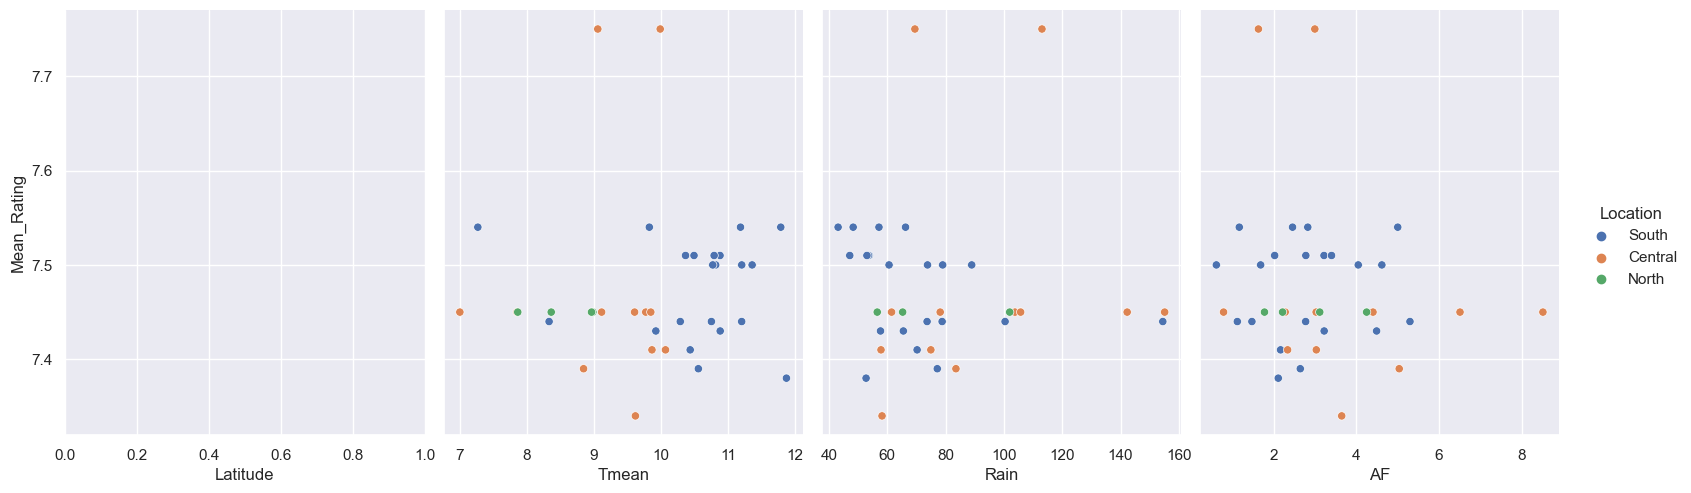

In [375]:
sns.pairplot(weather_happy,x_vars=['Latitude','Tmean','Rain','AF'],y_vars=['Mean_Rating'], height=5, aspect=.8,hue ='Location')
# South seems to have higher happy rating, except some outliers (from central)

In [359]:
weather_happy.corr()
#happy rating did not seem to have any strong correlation to any variables (location/area or weather)

,Tmax,Tmin,AF,Rain,Sun,Tmean,Latitude,Longtitude,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size
Tmax,1.000000,0.648542,-0.269786,-0.427369,0.792760,0.919502,-0.701933,0.319810,-0.106883,-0.042636,0.325112,-0.134129,-0.004797,-0.456651
Tmin,0.648542,1.000000,-0.869202,-0.183422,0.743628,0.895544,-0.464199,0.072779,-0.089728,-0.133590,0.176299,-0.013143,0.054206,-0.264984
AF,-0.269786,-0.869202,1.000000,0.077118,-0.474825,-0.606583,0.149197,0.100132,0.114426,0.184669,0.020734,-0.142432,-0.146791,0.187589
Rain,-0.427369,-0.183422,0.077118,1.000000,-0.649310,-0.344556,0.333153,-0.563009,0.147667,0.057494,-0.286998,0.083876,-0.035223,0.348970
Sun,0.792760,0.743628,-0.474825,-0.649310,1.000000,0.864458,-0.716952,0.476996,-0.207653,-0.244962,0.347507,-0.036489,0.123791,-0.418912
Tmean,0.919502,0.895544,-0.606583,-0.344556,0.864458,1.000000,-0.650059,0.224540,-0.108819,-0.093913,0.281099,-0.085197,0.025189,-0.403793
Latitude,-0.701933,-0.464199,0.149197,0.333153,-0.716952,-0.650059,1.000000,-0.356615,0.228324,0.288456,-0.379979,0.010812,-0.143953,0.408650
Longtitude,0.319810,0.072779,0.100132,-0.563009,0.476996,0.224540,-0.356615,1.000000,0.048147,0.064075,0.415503,-0.307277,-0.194903,-0.141556
Low_0_4,-0.106883,-0.089728,0.114426,0.147667,-0.207653,-0.108819,0.228324,0.048147,1.000000,0.558146,-0.206645,-0.579359,-0.872299,0.389176
Medium_5_6,-0.042636,-0.133590,0.184669,0.057494,-0.244962,-0.093913,0.288456,0.064075,0.558146,1.000000,0.244519,-0.824315,-0.835211,0.419508


In [ ]:
###########################################################
##Part 4 - Classify using Happiness Dataset###
############################################################

In [ ]:
############################
##     Classify          ###
############################

In [444]:
happy_rating = pd.DataFrame(weather_happy['Mean_Rating'])
happy_rating.describe()

,Mean_Rating
count,37.000000
mean,7.474324
std,0.082514
min,7.340000
25%,7.440000
50%,7.450000
75%,7.510000
max,7.750000


C:\Users\Wind\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

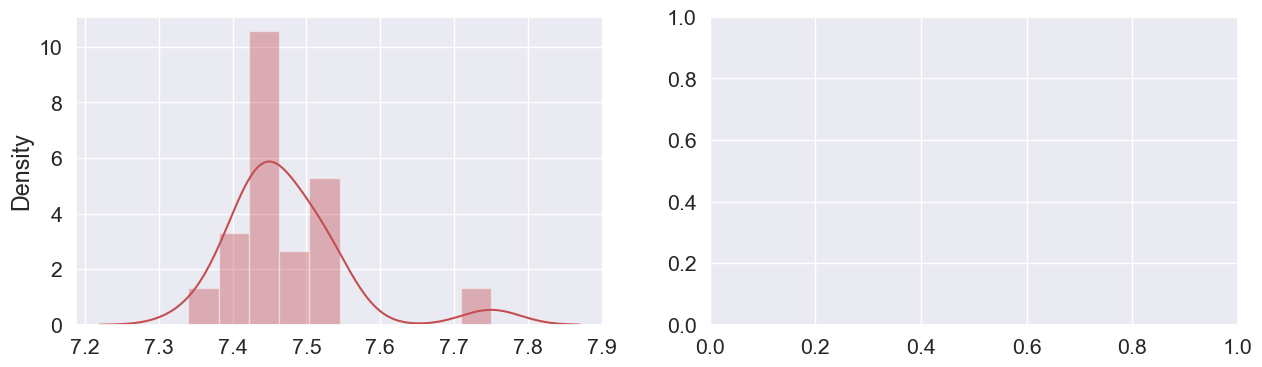

In [844]:
f, axes = plt.subplots(1,2,figsize=(15,4))
sns.distplot(happy_rating, kde=True,hist=True, color='r', ax=axes[0])


In [448]:
happy=[]
for rating in happy_rating['Mean_Rating']:
    if rating<7.45:
        happy.append('Below Avg Happy')
    elif 7.45<=rating<7.46:
        happy.append('Average Happy')
    else:
        happy.append('Higher than Average Happy')
        
categ_happy = pd.DataFrame(happy,columns=['Categories Happy Rating'])
categ_happy = pd.DataFrame(categ_happy['Categories Happy Rating'].astype('category'))
df1 = pd.concat([weather_happy,categ_happy],axis=1)


In [450]:
#check how many in each category
df1['Categories Happy Rating'].value_counts()

Higher than Average Happy    14
Below Avg Happy              13
Average Happy                10
Name: Categories Happy Rating, dtype: int64

C:\Users\Wind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Occurences in different UK areas')

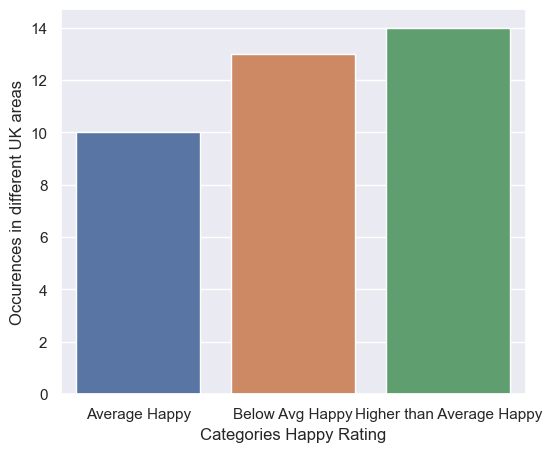

In [452]:
f, axes= plt.subplots(1,1,figsize=(6,5))
sns.countplot(df1['Categories Happy Rating'])
plt.xlabel('Categories Happy Rating')
plt.ylabel('Occurences in different UK areas')

In [869]:
df1.head()

,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Stations_y,Latitude,Longtitude,Location,Area,Area_Codes,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size,Categories Happy Rating
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,aberporth,52.139,-4.570,South,WALES,W92000004,9.56,16.54,39.45,34.45,7.44,19540,Below Avg Happy
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,armagh,54.352,-6.649,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540,Higher than Average Happy
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,ballypatrick,55.181,-6.153,Central,NORTHERN IRELAND,N92000002,6.76,14.66,37.57,41.00,7.75,2540,Higher than Average Happy
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,bradford,53.813,-1.772,Central,YORKSHIRE AND THE HUMBER,E12000003,10.21,16.60,38.56,34.63,7.41,13110,Below Avg Happy
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,braemar,57.006,-3.396,Central,SCOTLAND,S92000003,9.16,16.90,39.75,34.19,7.45,22760,Average Happy


In [806]:
##############################################################
### Classify Happy Rating Categories using percentage rating scores  ##
#############################################################

X_happy =df1[['Low_0_4', 'Medium_5_6', 'High_7_8','Veryhigh_9_10']]  # Features
y_happy =df1['Categories Happy Rating']  # Labels
# Split dataset into training set and test set
X_train_happy, X_test_happy, y_train_happy, y_test_happy = train_test_split(X_happy, y_happy, test_size=0.2)

In [864]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(X_train_happy,y_train_happy)

y_pred_happy=clf.predict(X_test_happy)

In [865]:
# Model Accuracy, accuracy that the classifier can correctly predict the category of happy
print("Accuracy using Random Forest Classifier:",metrics.accuracy_score(y_test_happy, y_pred_happy))

#Looks like the model overfits due to small dataset


Accuracy using Random Forest Classifier: 1.0


In [868]:
gaus.fit(X_train_happy,y_train_happy)

y_pred_happy_gau=gaus.predict(X_test_happy)
print("Accuracy of percentage ratings using Naive Bayes:",metrics.accuracy_score(y_test_happy, y_pred_happy_gau))

Accuracy of percentage ratings using Naive Bayes: 0.75


In [855]:
y_test_happy

14              Below Avg Happy
15    Higher than Average Happy
17                Average Happy
26              Below Avg Happy
27              Below Avg Happy
22    Higher than Average Happy
6     Higher than Average Happy
18    Higher than Average Happy
Name: Categories Happy Rating, dtype: category
Categories (3, object): ['Average Happy', 'Below Avg Happy', 'Higher than Average Happy']

In [475]:
y_pred_happy

array(['Below Avg Happy', 'Higher than Average Happy',
       'Higher than Average Happy', 'Average Happy', 'Below Avg Happy',
       'Higher than Average Happy', 'Higher than Average Happy',
       'Average Happy'], dtype=object)

In [723]:
# how about using latitude and longtitude to classify happy rating categories
X_happy_ll =df1[['Latitude', 'Longtitude']]  # Features
y_happy_ll =df1['Categories Happy Rating']  # Labels

# Split dataset into training set and test set
X_train_happy_ll, X_test_happy_ll, y_train_happy_ll, y_test_happy_ll = train_test_split(X_happy_ll, y_happy_ll, test_size=0.2)

In [724]:
clf
clf.fit(X_train_happy_ll,y_train_happy_ll)

y_pred_happy_ll=clf.predict(X_test_happy_ll)
print("Accuracy of Lat&Long using Random Forest Classifier:",metrics.accuracy_score(y_test_happy_ll, y_pred_happy_ll))

Accuracy of Lat&Long using Random Forest Classifier: 0.875


In [843]:
gaus.fit(X_train_happy_ll,y_train_happy_ll)

y_pred_happy_ll=gaus.predict(X_test_happy_ll)
print("Accuracy of Lat&Long using Naive Bayes:",metrics.accuracy_score(y_test_happy_ll, y_pred_happy_ll))

Accuracy of Lat&Long using Naive Bayes: 0.625


In [728]:
sv.fit(X_train_happy_ll,y_train_happy_ll)

y_pred_happy_ll=sv.predict(X_test_happy_ll)
print("Accuracy of Lat&Long using SVM Classifier:",metrics.accuracy_score(y_test_happy_ll, y_pred_happy_ll))

Accuracy of Lat&Long using SVM Classifier: 0.625


In [ ]:
####################################################################################
########## Try classifiying using categorical features such as Area or Location ###
###################################################################################


In [487]:
# we need to preposses categorical variables into numeric values
# Different ways to prepocess categorical variables: We use Label Encoder since there are more than 2 variables
le = preprocessing.LabelEncoder()

In [497]:
area = ['NORTH EAST','NORTH WEST', 'YORKSHIRE AND THE HUMBER', 'EAST MIDLANDS',' WEST MIDLANDS', 'EAST', 'LONDON', 'SOUTH EAST', 'SOUTH WEST',
        'WALES', 'SCOTLAND', 'NORTHERN IRELAND']
happy_cat = ['Below Avg Happy','Higher than Average Happy','Average Happy']
location = ['Central','South','North']

In [491]:
area_encoded=le.fit_transform(area)
area_encoded

array([ 4,  5, 11,  2,  0,  1,  3,  8,  9, 10,  7,  6], dtype=int64)

In [492]:
happy_cat_encoded=le.fit_transform(happy_cat)
happy_cat_encoded

array([1, 2, 0], dtype=int64)

In [498]:
location_encoded=le.fit_transform(location)
location_encoded


array([0, 2, 1], dtype=int64)

In [554]:
#pd.DataFrame(df1['Area'].astype('category'))
df1_ = df1[['Area']]
df1_['Area_Nr'] =le.fit_transform(df1['Area'])
df1_.value_counts()
    

<ipython-input-554-9629eca34bb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_['Area_Nr'] =le.fit_transform(df1['Area'])


Area                      Area_Nr
SCOTLAND                  6          10
WALES                     9           4
SOUTH WEST                8           4
SOUTH EAST                7           4
YORKSHIRE AND THE HUMBER  11          3
WEST MIDLANDS             10          2
NORTHERN IRELAND          5           2
NORTH WEST                4           2
EAST MIDLANDS             1           2
EAST                      0           2
NORTH EAST                3           1
LONDON                    2           1
dtype: int64

In [598]:
# you can also create another column with with numerical values using label encoder fit_transform
df2 = df1.copy()
df2['Area_Number']= le.fit_transform(df1['Area'])
df2['Happy Category Nr']= le.fit_transform(df1['Categories Happy Rating'])

In [599]:
df2.drop('Stations_y', axis=1, inplace= True)
df2.head()

,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Latitude,Longtitude,Location,...,Area_Codes,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size,Categories Happy Rating,Area_Number,Happy Category Nr
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,52.139,-4.570,South,...,W92000004,9.56,16.54,39.45,34.45,7.44,19540,Below Avg Happy,9,1
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,54.352,-6.649,Central,...,N92000002,6.76,14.66,37.57,41.00,7.75,2540,Higher than Average Happy,5,2
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,55.181,-6.153,Central,...,N92000002,6.76,14.66,37.57,41.00,7.75,2540,Higher than Average Happy,5,2
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,53.813,-1.772,Central,...,E12000003,10.21,16.60,38.56,34.63,7.41,13110,Below Avg Happy,11,1
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,57.006,-3.396,Central,...,S92000003,9.16,16.90,39.75,34.19,7.45,22760,Average Happy,6,0


In [733]:
# Try adding as well another column with numerical values for Location
df1loc = df1[['Location']]
df1loc['Location_Nr'] =le.fit_transform(df1['Location'])
df1loc.value_counts()


<ipython-input-733-e2839449c724>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1loc['Location_Nr'] =le.fit_transform(df1['Location'])


Location  Location_Nr
South     2              21
Central   0              12
North     1               4
dtype: int64

In [735]:
df2['Location_Number']= le.fit_transform(df1['Location'])
df2.head()

,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Latitude,Longtitude,Location,...,Low_0_4,Medium_5_6,High_7_8,Veryhigh_9_10,Mean_Rating,Sample_Size,Categories Happy Rating,Area_Number,Happy Category Nr,Location_Number
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,52.139,-4.570,South,...,9.56,16.54,39.45,34.45,7.44,19540,Below Avg Happy,9,1,2
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,54.352,-6.649,Central,...,6.76,14.66,37.57,41.00,7.75,2540,Higher than Average Happy,5,2,0
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,55.181,-6.153,Central,...,6.76,14.66,37.57,41.00,7.75,2540,Higher than Average Happy,5,2,0
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,53.813,-1.772,Central,...,10.21,16.60,38.56,34.63,7.41,13110,Below Avg Happy,11,1,0
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,57.006,-3.396,Central,...,9.16,16.90,39.75,34.19,7.45,22760,Average Happy,6,0,0


In [876]:
# How about Location or Area: Using Random Forest classifier
X_happy_area =df2['Area_Number']# Features
X_happy_area.to_numpy
y_happy_area =df2['Happy Category Nr']  # Labels
y_happy_area.to_numpy
# Split dataset into training set and test set
X_train_happy_area, X_test_happy_area, y_train_happy_area, y_test_happy_area = train_test_split(X_happy_area, y_happy_area, test_size=0.2)

In [877]:
X_train_happy_area = X_train_happy_area.values.reshape(-1,1)
y_train_happy_area = y_train_happy_area.values.reshape(-1,1)


In [878]:

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_happy_area,y_train_happy_area.ravel())


RandomForestClassifier()

In [879]:
X_test_happy_area = X_test_happy_area.values.reshape(-1,1)
y_test_happy_area = y_test_happy_area.values.reshape(-1,1)

In [875]:
y_pred_happy_area=clf.predict(X_test_happy_area)
print("Accuracy of Area using Random Forest Classifier:",metrics.accuracy_score(y_test_happy_area, y_pred_happy_area))
print("Confusion matrix of feature Location using Random Forest Classifier:")
print(metrics.confusion_matrix(y_test_happy_area, y_pred_happy_area))
print("Classification report of feature Location using Random Forest Classifier:")
print(metrics.classification_report(y_test_happy_area, y_pred_happy_area))

Accuracy of Area using Random Forest Classifier: 1.0
Confusion matrix of feature Location using Random Forest Classifier:
[[1 0 0]
 [0 5 0]
 [0 0 2]]
Classification report of feature Location using Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [741]:
### Prob of overfitting? Let's try Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [742]:
gaus = GaussianNB()

gaus.fit(X_train_happy_area,y_train_happy_area.ravel())

GaussianNB()

In [743]:
y_pred_happy_area=gaus.predict(X_test_happy_area)
print("Accuracy of Area using Naive Bayes Classifier:",metrics.accuracy_score(y_test_happy_area, y_pred_happy_area))

Accuracy of Area using Naive Bayes Classifier: 0.875


In [744]:
## Try SVM classifier
from sklearn import svm
sv = svm.SVC(kernel='linear') 

In [745]:
sv.fit(X_train_happy_area,y_train_happy_area.ravel())

SVC(kernel='linear')

In [746]:
y_pred_happy_area=sv.predict(X_test_happy_area)
print("Accuracy of feature Area using SVM classifier:",metrics.accuracy_score(y_test_happy_area, y_pred_happy_area))

Accuracy of feature Area using SVM classifier: 0.75


In [786]:
##############################
## Classify using Location  ##
##############################
X_happy_loc =df2['Location_Number']# Features
X_happy_loc.to_numpy
y_happy_loc =df2['Happy Category Nr']  # Labels
y_happy_loc.to_numpy
# Split dataset into training set and test set
X_train_happy_loc, X_test_happy_loc, y_train_happy_loc, y_test_happy_loc = train_test_split(X_happy_loc, y_happy_loc, test_size=0.2)

In [787]:
X_train_happy_loc = X_train_happy_loc.values.reshape(-1,1)
y_train_happy_loc = y_train_happy_loc.values.reshape(-1,1)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_happy_loc,y_train_happy_loc.ravel())

X_test_happy_loc = X_test_happy_loc.values.reshape(-1,1)
y_test_happy_loc = y_test_happy_loc.values.reshape(-1,1)

y_pred_happy_loc=clf.predict(X_test_happy_loc)
print("Accuracy of feature Location using Random Forest Classifier:",metrics.accuracy_score(y_test_happy_loc, y_pred_happy_loc))
print('Confusion matrix of feature Location using Random Forest Classifier:')
print(metrics.confusion_matrix(y_test_happy_loc, y_pred_happy_loc))
print("Classification report of feature Location using Random Forest Classifier:")
print(metrics.classification_report(y_test_happy_loc, y_pred_happy_loc))


Accuracy of feature Location using Random Forest Classifier: 0.5
Confusion matrix of feature Location using Random Forest Classifier:
[[1 0 0]
 [1 0 2]
 [1 0 3]]
Classification report of feature Location using Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         3
           2       0.60      0.75      0.67         4

    accuracy                           0.50         8
   macro avg       0.31      0.58      0.39         8
weighted avg       0.34      0.50      0.40         8



C:\Users\Wind\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


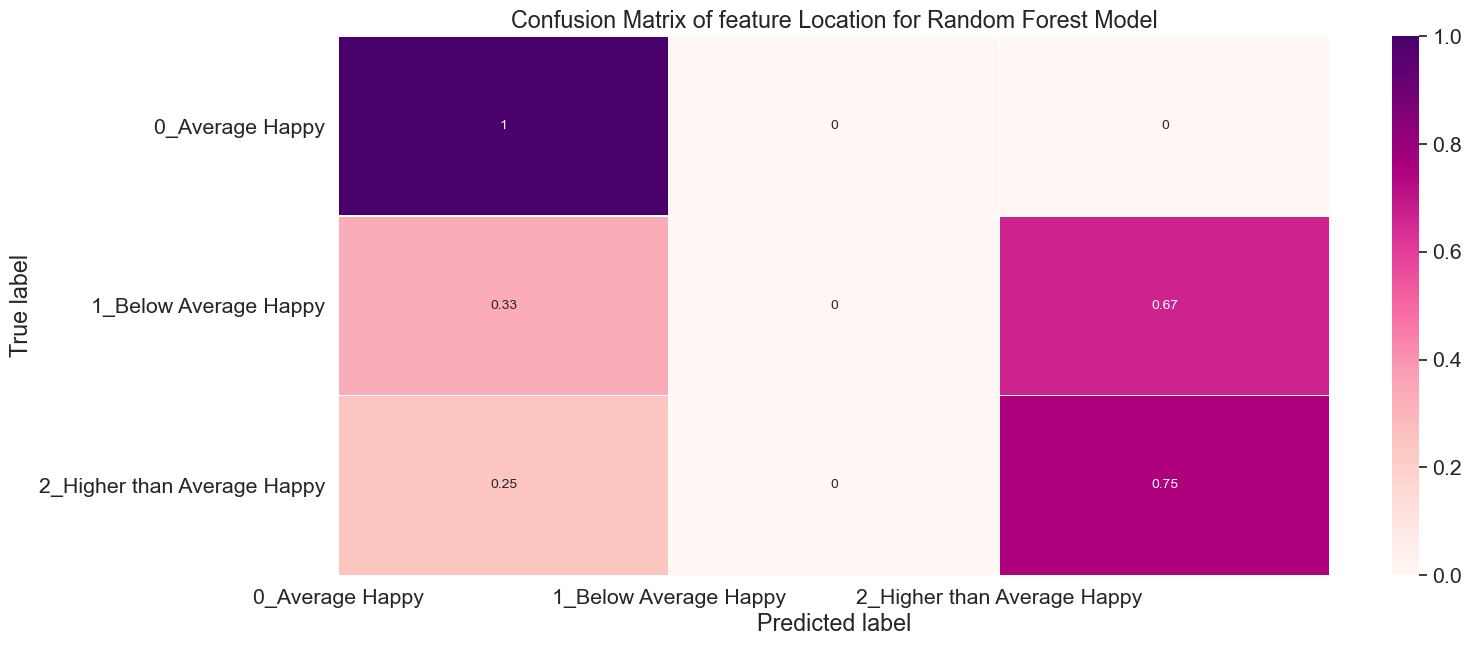

In [792]:
# Get and reshape confusion matrix data
confu_matrix = confusion_matrix(y_test_happy_loc, y_pred_happy_loc)
confu_matrix = confu_matrix.astype('float') / confu_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(confu_matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.RdPu, linewidths=0.2)

# Add labels to the plot
labels_names = ['0_Average Happy', '1_Below Average Happy', '2_Higher than Average Happy']
tick_marks = np.arange(len(labels_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, labels_names, rotation=0)
plt.yticks(tick_marks2, labels_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of feature Location for Random Forest Model')
plt.show()


##### you can see here that RF classifier struggles to predict below average happy. This can be seen also from Classi.report 

In [892]:
# Repeat using other classifiers 
#Naive Bayes
gaus = GaussianNB()

gaus.fit(X_train_happy_loc,y_train_happy_loc.ravel())

y_pred_happy_loc=gaus.predict(X_test_happy_loc)
print("Accuracy of Location using Naive Bayes Classifier:",metrics.accuracy_score(y_test_happy_loc, y_pred_happy_loc))
print('Confusion matrix of feature Location using Naive Bayes Classifier:')
print(metrics.confusion_matrix(y_test_happy_loc, y_pred_happy_loc))
print("Classification report of feature Location using Naive Bayes Classifier:")
print(metrics.classification_report(y_test_happy_loc, y_pred_happy_loc,zero_division=0))

Accuracy of Location using Naive Bayes Classifier: 0.5
Confusion matrix of feature Location using Naive Bayes Classifier:
[[1 0 0]
 [1 0 2]
 [1 0 3]]
Classification report of feature Location using Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         3
           2       0.60      0.75      0.67         4

    accuracy                           0.50         8
   macro avg       0.31      0.58      0.39         8
weighted avg       0.34      0.50      0.40         8



In [893]:
# Try SVM

sv = svm.SVC(kernel='linear') 
sv.fit(X_train_happy_loc,y_train_happy_loc.ravel())

y_pred_happy_loc=gaus.predict(X_test_happy_loc)
print("Accuracy of Location using Naive Bayes Classifier:",metrics.accuracy_score(y_test_happy_loc, y_pred_happy_loc))
print('Confusion matrix of feature Location using Support Vector Classifier:')
print(metrics.confusion_matrix(y_test_happy_loc, y_pred_happy_loc))
print("Classification report of feature Location using Support Vector Classifier:")
print(metrics.classification_report(y_test_happy_loc, y_pred_happy_loc, zero_division=0))


Accuracy of Location using Naive Bayes Classifier: 0.5
Confusion matrix of feature Location using Support Vector Classifier:
[[1 0 0]
 [1 0 2]
 [1 0 3]]
Classification report of feature Location using Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         3
           2       0.60      0.75      0.67         4

    accuracy                           0.50         8
   macro avg       0.31      0.58      0.39         8
weighted avg       0.34      0.50      0.40         8

